# Palmers Penguins Exploratory Analysis

## - Notebook Preparation

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

---

## - Load File

In [3]:
# reading files
df=pd.read_csv("penguins_size.csv")

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


---

## - Data Overview

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.shape

(344, 7)

- *The dataset consists of 344 observations with 17 attrbutes.*

In [7]:
# understanding unique values of categorical colums
unique_val = list(df.select_dtypes("object").columns)

for column in unique_val:
    print(column, ': ', df[column].nunique(), "", end = "")
    print(df[column].unique())

species :  3 ['Adelie' 'Chinstrap' 'Gentoo']
island :  3 ['Torgersen' 'Biscoe' 'Dream']
sex :  3 ['MALE' 'FEMALE' nan '.']


- *There are 3 species and 3 islands in the study*
- *Sex has some missing values coded as '.'*

In [8]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

- Some missing values were detected
- Sex has the most missing values

---

## - Cleaning Data

In [9]:
# Fixing values of sex
df["sex"] = df["sex"].replace(".",np.nan)
df["sex"].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [10]:
# Quality of Life Fix (Name Format)
df["sex"] = df["sex"].replace(["MALE","FEMALE"],["Male","Female"])

In [11]:
# removing rows of missing data
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


- *2 rows of the dataset contain mostly missing values, so I aim in removing them*

In [12]:
# calculating the number of non-null values in each row
non_null_counts = df.notnull().sum(axis=1)

# define a threshold
threshold = 0.8

# filter out rows where ratio of non-null values to total columns is below the threshold
filtered_df = df[non_null_counts / len(df.columns) >= threshold]


In [13]:
filtered_df[filtered_df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


- *Since the goal is pure exploratory analysis I did not touch the other missing values*

---

## - Exploratory Analysis

### : Summary Statistics

In [14]:
# creating a custom describe function
def custom_describe(dataframe, group_by=None):
    if group_by:
        grouped = dataframe.groupby(group_by)
        description = grouped.describe(percentiles=[.5])
    else:
        description = dataframe.describe()

    return description.T.round(2)


In [15]:
# Overall summary statistics
custom_describe(filtered_df)


,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.92,5.46,32.1,39.22,44.45,48.5,59.6
culmen_depth_mm,342.0,17.15,1.97,13.1,15.60,17.30,18.7,21.5
flipper_length_mm,342.0,200.92,14.06,172.0,190.00,197.00,213.0,231.0
body_mass_g,342.0,4201.75,801.95,2700.0,3550.00,4050.00,4750.0,6300.0


In [16]:
custom_describe(filtered_df, group_by="species")

species                   Adelie  Chinstrap   Gentoo
culmen_length_mm  count   151.00      68.00   123.00
                  mean     38.79      48.83    47.50
                  std       2.66       3.34     3.08
                  min      32.10      40.90    40.90
                  50%      38.80      49.55    47.30
                  max      46.00      58.00    59.60
culmen_depth_mm   count   151.00      68.00   123.00
                  mean     18.35      18.42    14.98
                  std       1.22       1.14     0.98
                  min      15.50      16.40    13.10
                  50%      18.40      18.45    15.00
                  max      21.50      20.80    17.30
flipper_length_mm count   151.00      68.00   123.00
                  mean    189.95     195.82   217.19
                  std       6.54       7.13     6.48
                  min     172.00     178.00   203.00
                  50%     190.00     196.00   216.00
                  max     210.00     212.00   231.00
body_mass_g       count   151.00      68.00   123.00
                  mean   3700.66    3733.09  5076.02
                  std     458.57     384.34   504.12
                  min    2850.00    2700.00  3950.00
                  50%    3700.00    3700.00  5000.00
                  max    4775.00    4800.00  6300.00

In [17]:
custom_describe(filtered_df, group_by="island")

island                    Biscoe    Dream  Torgersen
culmen_length_mm  count   167.00   124.00      51.00
                  mean     45.26    44.17      38.95
                  std       4.77     5.95       3.03
                  min      34.50    32.10      33.50
                  50%      45.80    44.65      38.90
                  max      59.60    58.00      46.00
culmen_depth_mm   count   167.00   124.00      51.00
                  mean     15.87    18.34      18.43
                  std       1.82     1.13       1.34
                  min      13.10    15.50      15.90
                  50%      15.50    18.40      18.40
                  max      21.10    21.20      21.50
flipper_length_mm count   167.00   124.00      51.00
                  mean    209.71   193.07     191.20
                  std      14.14     7.51       6.23
                  min     172.00   178.00     176.00
                  50%     214.00   193.00     191.00
                  max     231.00   212.00     210.00
body_mass_g       count   167.00   124.00      51.00
                  mean   4716.02  3712.90    3706.37
                  std     782.86   416.64     445.11
                  min    2850.00  2700.00    2900.00
                  50%    4775.00  3687.50    3700.00
                  max    6300.00  4800.00    4700.00

In [18]:
custom_describe(filtered_df, group_by="sex")

sex                       Female     Male
culmen_length_mm  count   165.00   168.00
                  mean     42.10    45.85
                  std       4.90     5.37
                  min      32.10    34.60
                  50%      42.80    46.80
                  max      58.00    59.60
culmen_depth_mm   count   165.00   168.00
                  mean     16.43    17.89
                  std       1.80     1.86
                  min      13.10    14.10
                  50%      17.00    18.45
                  max      20.70    21.50
flipper_length_mm count   165.00   168.00
                  mean    197.36   204.51
                  std      12.50    14.55
                  min     172.00   178.00
                  50%     193.00   200.50
                  max     222.00   231.00
body_mass_g       count   165.00   168.00
                  mean   3862.27  4545.68
                  std     666.17   787.63
                  min    2700.00  3250.00
                  50%    3650.00  4300.00
                  max    5200.00  6300.00

### : Distributions / Univariate Analysis

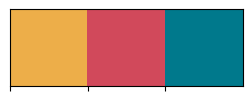

In [19]:
# style of visualization
plt.style.use("_classic_test_patch")

# custom Color Palletes 
my_pallet = ["#edae49", "#d1495b", "#00798c"]

# color palletes
sns.palplot(my_pallet)

Text(0.5, 0.98, 'Penguin Species Distribution')

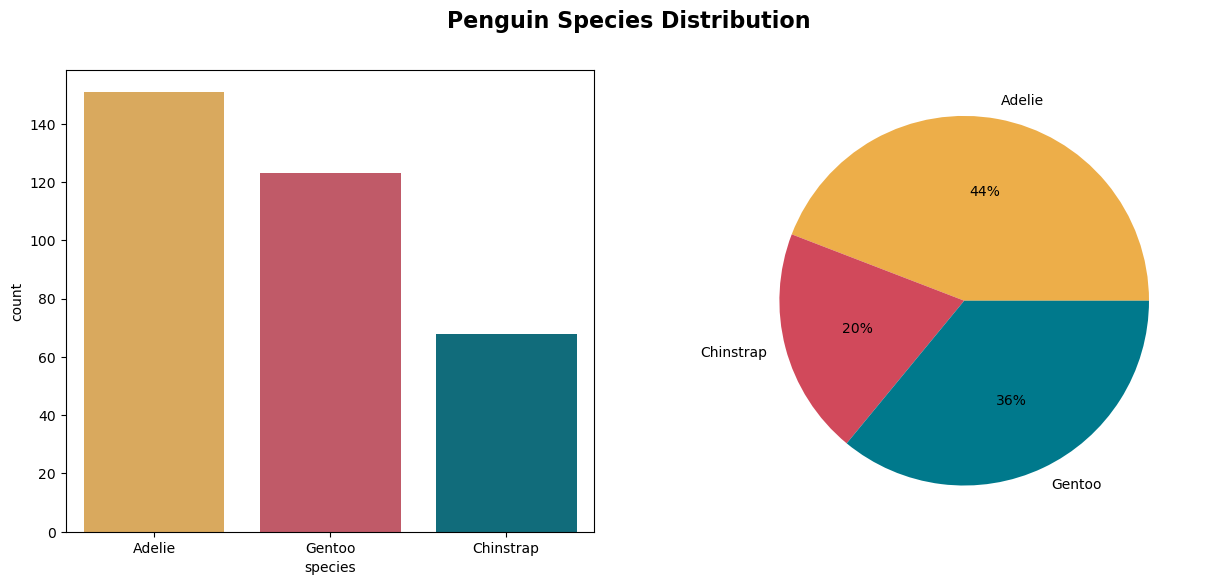

In [20]:
# species distribution
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# countplot
sns.countplot(data=filtered_df, x= filtered_df["species"], order= filtered_df["species"].value_counts().index, ax=axes[0],
              palette=my_pallet)

# pie chart
filtered_df.groupby("species").size().plot(kind="pie", colors = my_pallet, ax=axes[1], autopct="%.0f%%")

plt.suptitle("Penguin Species Distribution", fontweight = "heavy", fontsize = 16)

- *The Adélie species constitutes the majority of individuals*
- *The Chinstrap penguin species has the fewest number of samples.*

Text(0.5, 0.98, 'Penguin Island Distribution')

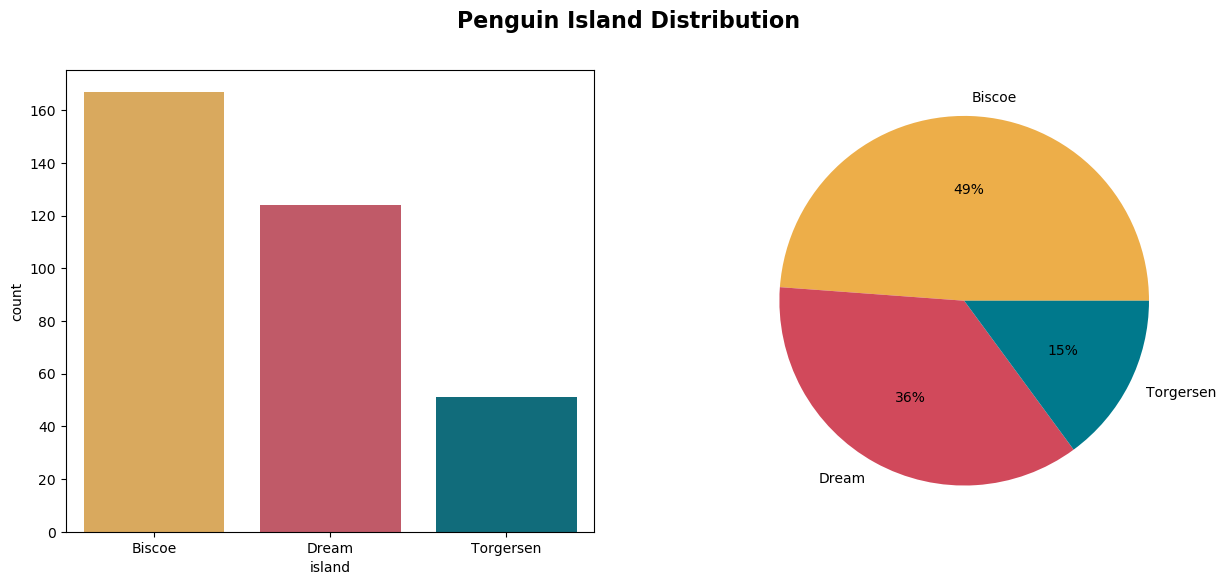

In [21]:
# island distribution
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# countplot
sns.countplot(data=filtered_df, x= filtered_df["island"], order= filtered_df["island"].value_counts().index, ax=axes[0],
              palette=my_pallet)

# pie chart
filtered_df.groupby("island").size().plot(kind='pie', colors = my_pallet, ax=axes[1], autopct="%.0f%%")

plt.suptitle("Penguin Island Distribution", fontweight = "heavy", fontsize = 16)

- *Most pinguins are located at the Biscoe island*
- *Only 15% of the penguins are on the Torgersen island*

Text(0.5, 0.98, 'Penguin Sex Pie Chart')

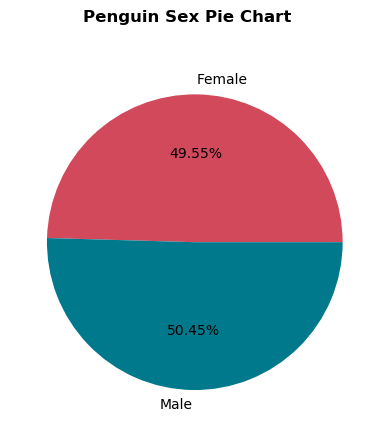

In [34]:
# sex distribution
# pie chart
filtered_df.groupby('sex').size().plot(kind="pie", colors = [my_pallet[1],my_pallet[-1]], autopct="%.2f%%")

plt.suptitle("Penguin Sex Pie Chart", fontweight = "heavy", fontsize = 12)

- *The gender distribution among penguins is approximately equal*

Text(0.5, 0.98, 'Penguin Species Distribution by Island')

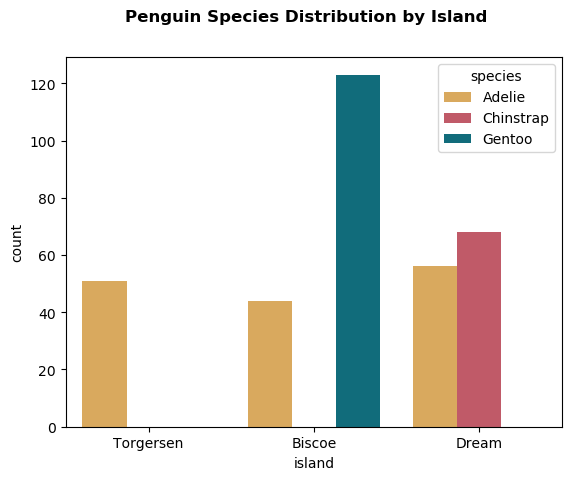

In [27]:
# species distribution by island
sns.countplot(data=filtered_df, x="island", hue="species",palette = my_pallet )

plt.suptitle("Penguin Species Distribution by Island", fontweight = "heavy", fontsize = 12)

- *Adelie penguin species is present in all islands, about equally*
- *Torgersen island contains only Adelie penguins*
- *Biscoe island contains only Gentoo penguins*
- *Dream island contains only Chinstrap penguins*

Text(0.5, 0.98, 'Penguin Sex Distribution by Island & Species')

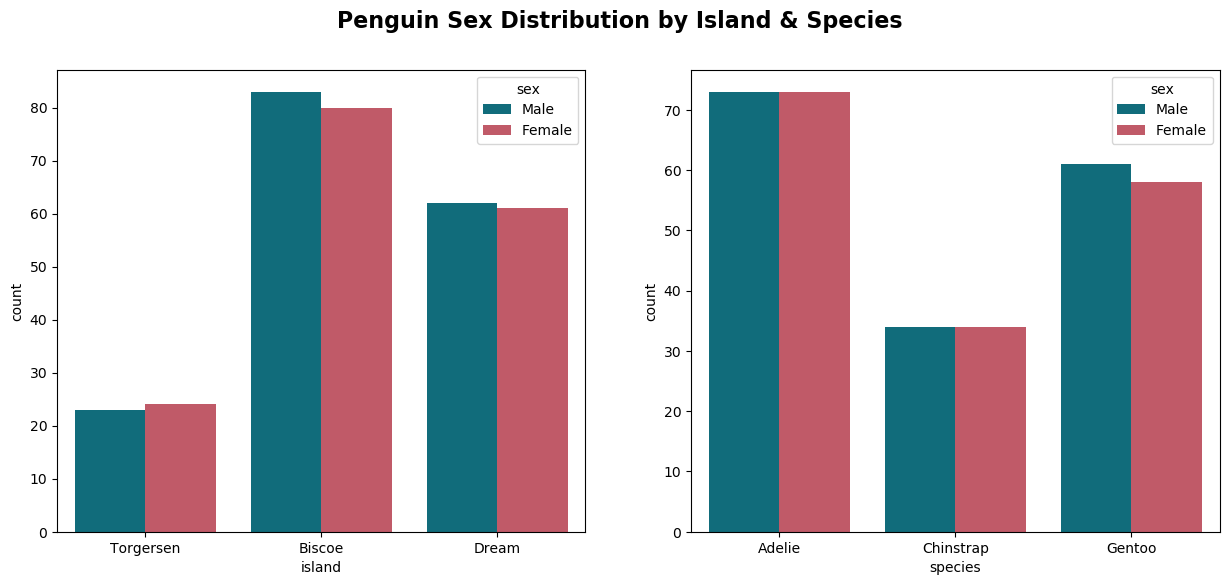

In [44]:
# sex distribution by island
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.countplot(data=filtered_df, x="island", hue="sex",palette = [my_pallet[-1],my_pallet[1]], ax=axes[0] )

sns.countplot(data=filtered_df, x="species", hue="sex",palette = [my_pallet[-1],my_pallet[1]], ax=axes[1] )


plt.suptitle("Penguin Sex Distribution by Island & Species", fontweight = "heavy", fontsize = 16)

- *The sample composition in terms of sex is similar across the various categories of islands and speciesy*

### : Bivariate Analysis

Text(0.5, 0.98, 'Pairplot Variables by Species')

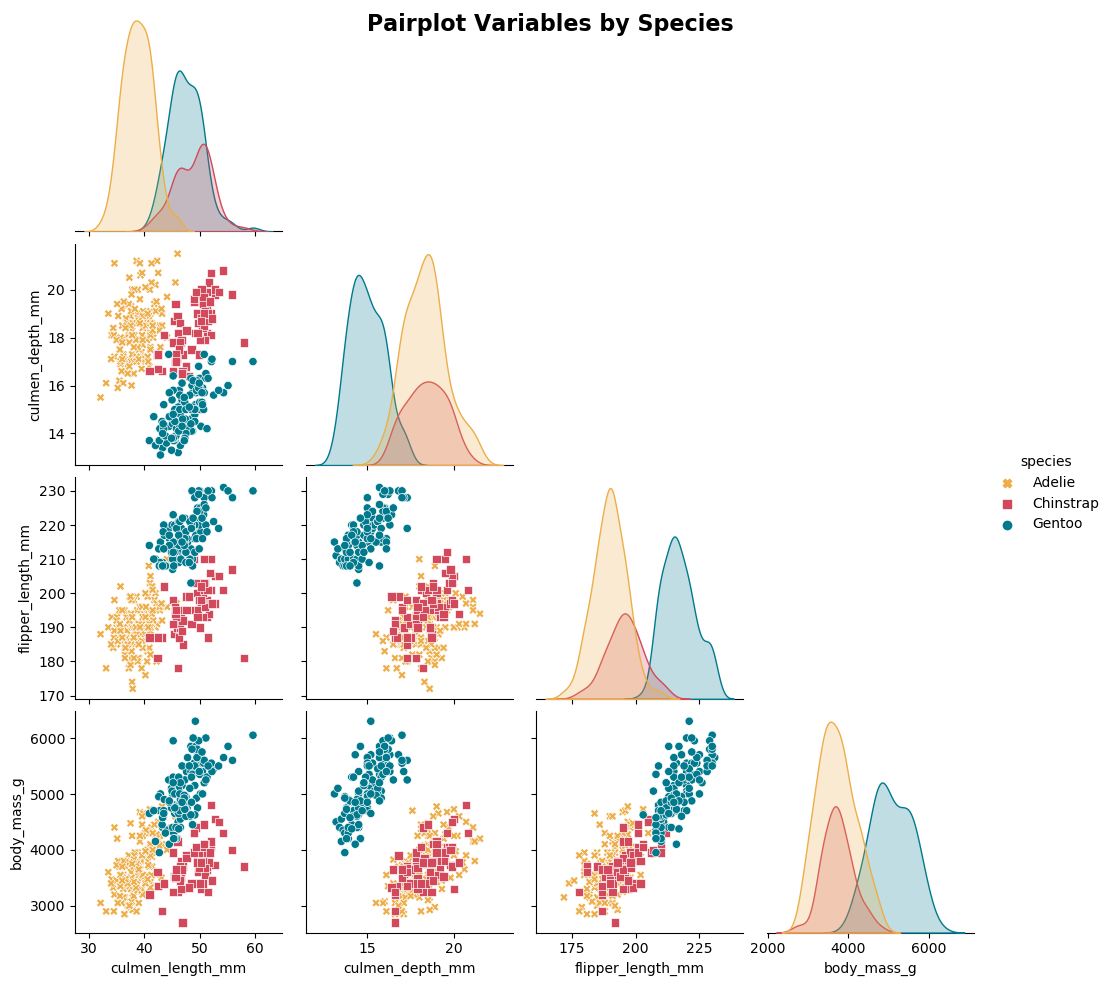

In [35]:
# pairplot by species
sns.pairplot(filtered_df, hue = "species", diag_kind = "kde", palette = my_pallet, markers = ['X', 's', 'o'], corner=True)

plt.suptitle("Pairplot Variables by Species", fontweight = "heavy", fontsize = 16)

Text(0.5, 0.98, 'Violin Plot of Physical Features by Species')

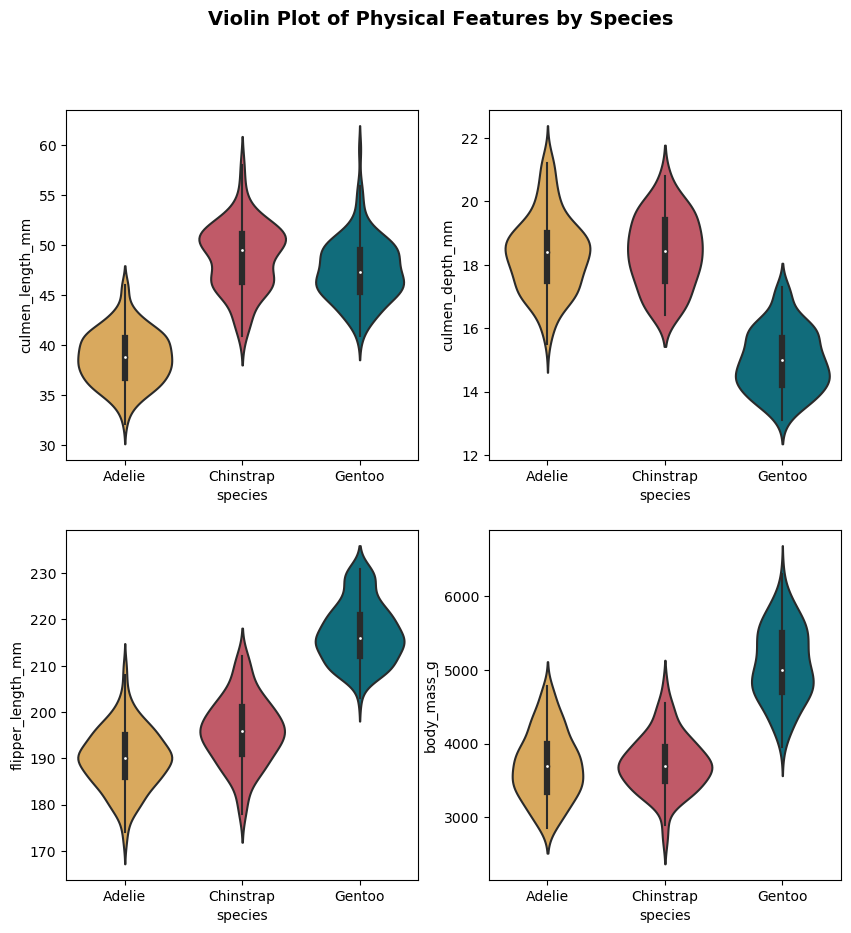

In [46]:
# physical characteristics violin plot by species
fig, axes = plt.subplots(2, 2, figsize=(10,10))

sns.violinplot(data=filtered_df, x="species", y="culmen_length_mm", ax=axes[0,0], palette= my_pallet)
sns.violinplot(data=filtered_df, x="species", y="culmen_depth_mm", ax=axes[0,1], palette= my_pallet)
sns.violinplot(data=filtered_df, x="species", y="flipper_length_mm", ax=axes[1,0], palette= my_pallet)
sns.violinplot(data=filtered_df, x="species", y="body_mass_g", ax=axes[1,1], palette= my_pallet)

# Add title and labels
plt.suptitle("Violin Plot of Physical Features by Species", fontweight = "heavy", fontsize = 14)

- *Adelie Penguins present smaller culmen and smaller flippers*
- *Adelie and Chinstrap penguins are the penguins that weigth less*
- Gentoo penguins possess larger flippers and bigger culmens compared to some other species, although they have shallower culmens and are generally heavier
- *In average Chinstrap penguins present the bigger culmen of all*
- *Adelie and Chinstrap penguins are highly similiar, only diferenciating on culmen length*

Text(0.5, 0.98, 'Pairplot Variables by Sex')

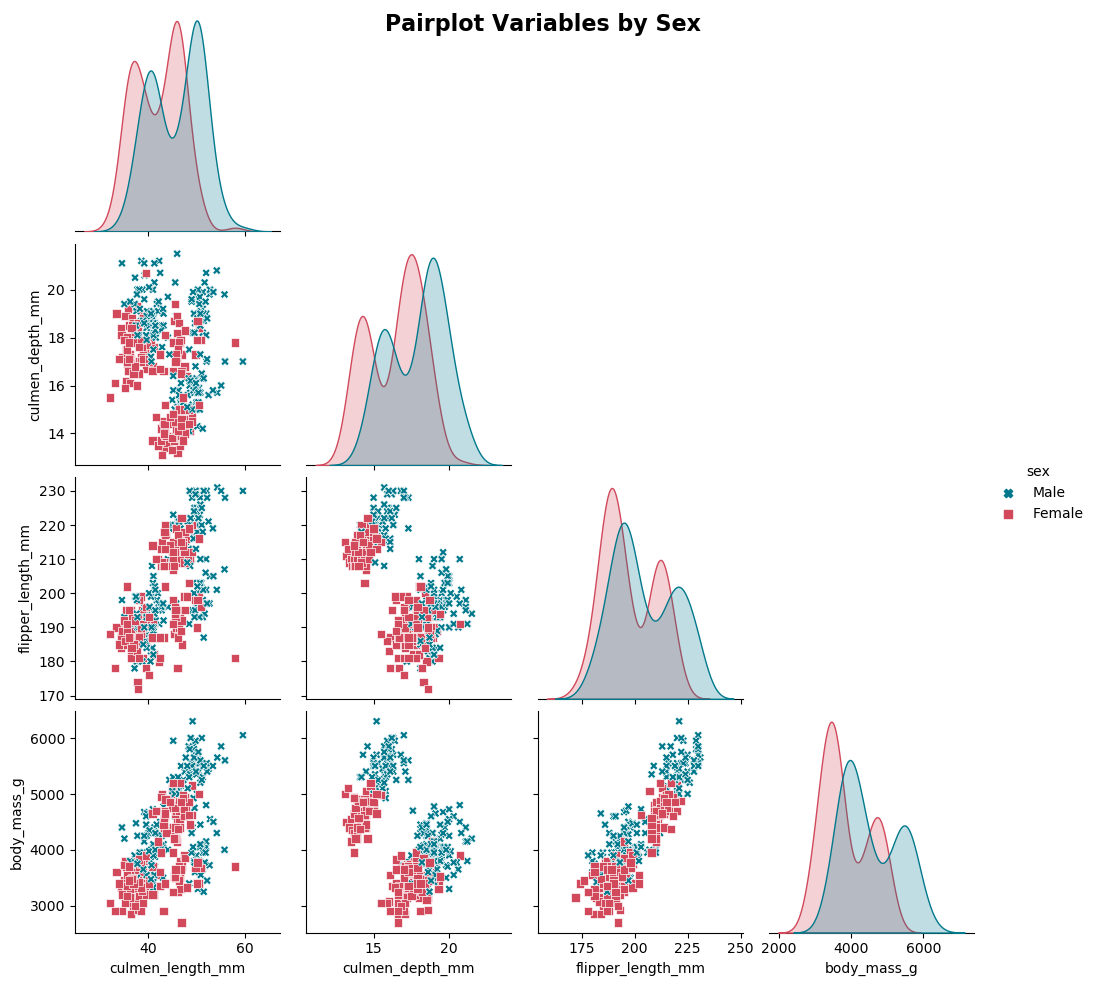

In [39]:
# pairplot by island
sns.pairplot(filtered_df, hue = "sex", diag_kind = "kde", palette = [my_pallet[-1],my_pallet[1]], markers = ['X', 's', 'o'], corner=True)

plt.suptitle("Pairplot Variables by Sex", fontweight = "heavy", fontsize = 16)

Text(0.5, 0.98, 'Violin Plot of Physical Features by Sex')

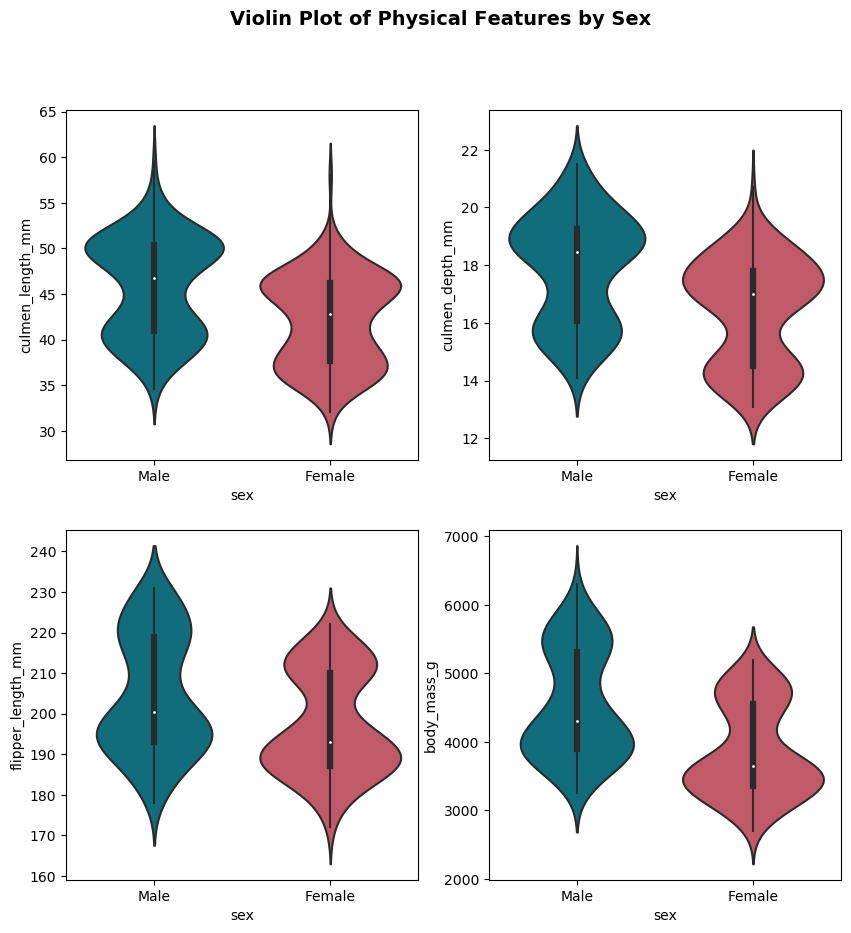

In [54]:
# physical characteristics violin plot by sex
fig, axes = plt.subplots(2, 2, figsize=(10,10))


sns.violinplot(data=filtered_df, x="sex", y="culmen_length_mm", ax=axes[0,0], palette= [my_pallet[-1],my_pallet[1]])
sns.violinplot(data=filtered_df, x="sex", y="culmen_depth_mm", ax=axes[0,1], palette= [my_pallet[-1],my_pallet[1]])
sns.violinplot(data=filtered_df, x="sex", y="flipper_length_mm", ax=axes[1,0], palette= [my_pallet[-1],my_pallet[1]])
sns.violinplot(data=filtered_df, x="sex", y="body_mass_g", ax=axes[1,1], palette= [my_pallet[-1],my_pallet[1]])

# Add title and labels
plt.suptitle("Violin Plot of Physical Features by Sex", fontweight = "heavy", fontsize = 14)

- *Female penguins have smaller features when comparing to male penguins. This ignoring species conditioning*

### : Multivariate Analysis

In [48]:
# creating a copy of the treated dataset
df_cor = filtered_df.copy()

In [49]:
# transform variables in numerical
# sex
df_cor["Male"] = df_cor["sex"].apply(lambda x: 1 if x == "Male" else 0)
df_cor.drop("sex", axis=1, inplace=True)

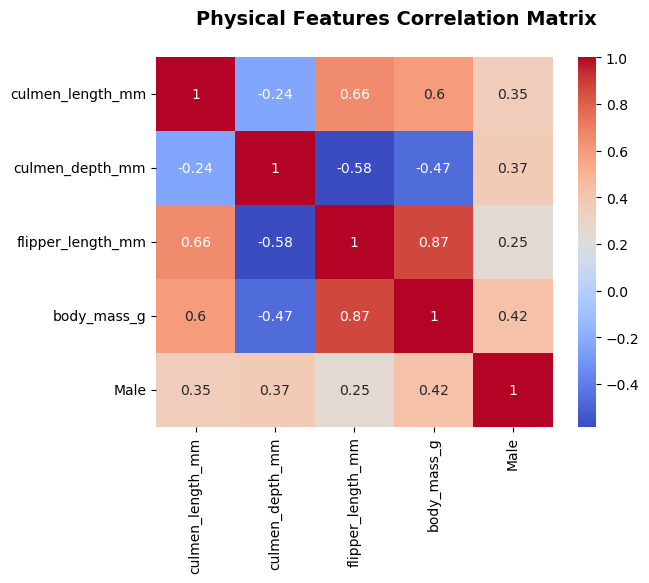

In [55]:
sns.heatmap(df_cor.corr(),annot=True,cmap="coolwarm") 
plt.suptitle("Physical Features Correlation Matrix", fontweight = "heavy", fontsize = 14)
plt.show()

- *When analyzing correlation with features, we can see the body mass of a penguin is highly correlated with the flipper length of the same.Also the culmen length is positvely correlated with the flipper length and the body mass. On the other hand, culmen depth is negatively correlated with the flipper length of a penguin*
- *The fact the penguin is male or not, is slightly correlated with the physical features, specially body mass*